<a href="https://colab.research.google.com/github/pursh2002/Machine-learning-with-Siraj-Raval-sept-2019..-Dr-Purshottam/blob/master/Pneumonia_detection_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learnig using Pretrained Inception V3 Model

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'pursh2002'
os.environ['KAGGLE_KEY'] = 'xxxxxxx'

### Load Dataset from kaggle

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 98% 1.13G/1.15G [00:21<00:00, 43.7MB/s]
100% 1.15G/1.15G [00:21<00:00, 58.0MB/s]


In [0]:
#!unzip chest-xray-pneumonia.zip
#!unzip chest_xray.zip

In [1]:
ls

awesome_model.h5  chest-xray-pneumonia.zip  __MACOSX/
chest_xray/       chest_xray.zip            sample_data/


In [2]:
ls chest_xray/train/

NORMAL/  PNEUMONIA/


In [3]:
ls chest_xray/test

NORMAL/  PNEUMONIA/


**Import** 

In [4]:
import keras
import os
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
path_train = "/content/chest_xray/train"
path_test = "/content/chest_xray/test"
path_val = "/content/chest_xray/val"

### Explore the dataset

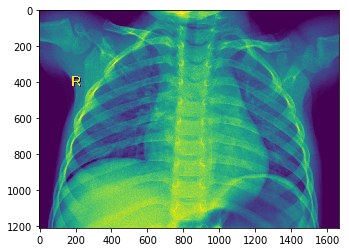

In [11]:
img = mpimg.imread(path_train + '/NORMAL/IM-0215-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
def plot_images(path, labeled=False, max_images=6):
  amount = 0
  fig = plt.figure(figsize=(12, 6))

  for file in os.listdir(path):
    if file.endswith('.jpeg'):
      if amount == max_images:
        break

      img = mpimg.imread(os.path.join(path, file))
      plt.subplot(231+amount)
      if labeled:
        plt.title(file.split('_')[1])
      imgplot = plt.imshow(img)

      amount += 1


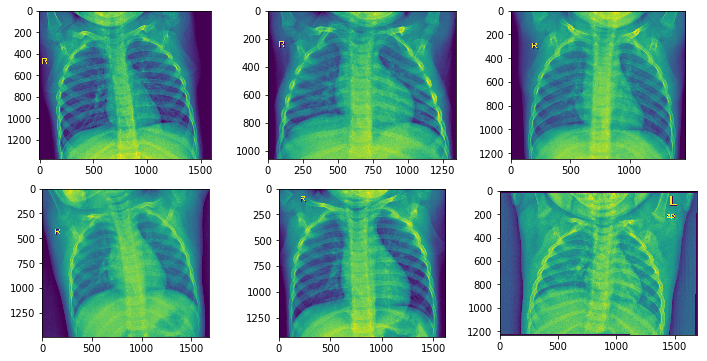

In [13]:
plot_images(path_train + '/NORMAL')

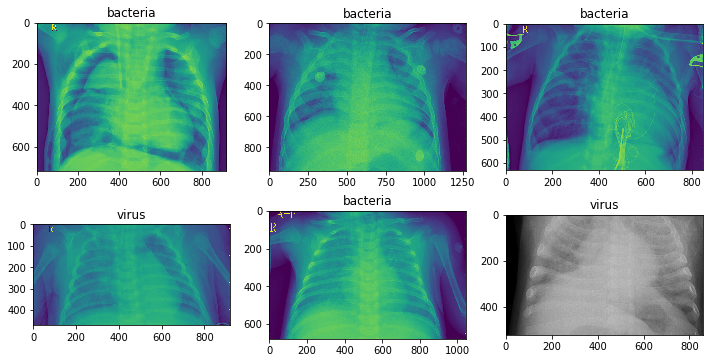

In [14]:
plot_images(path_train + '/PNEUMONIA', labeled=True)

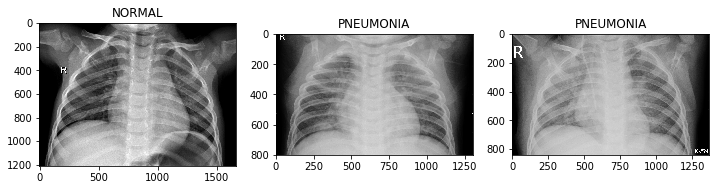

In [15]:
# Normal 
img_normal = plt.imread(path_train + '/NORMAL/IM-0215-0001.jpeg')
# Bacterial
img_penumonia_bacteria = plt.imread(path_train + '/PNEUMONIA/person1513_bacteria_3962.jpeg')
# Viral
img_penumonia_virus = plt.imread(path_train + '/PNEUMONIA/person620_virus_1191.jpeg')

# Plot Configuration
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1).set_title('NORMAL')
plt.imshow(img_normal, cmap='gray')
plt.subplot(1,3,2).set_title('PNEUMONIA')
plt.imshow(img_penumonia_bacteria, cmap='gray')
plt.subplot(1,3,3).set_title('PNEUMONIA')
plt.imshow(img_penumonia_virus, cmap='gray')


In [0]:

import os
from tensorflow.keras import layers
from tensorflow.keras import Model

In [18]:
rescale = 1./255.0
target_size = (150, 150)
batch_size = 32
class_mode = 'categorical'

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=rescale
)
train_generator = train_datagen.flow_from_directory(
    path_train,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=rescale)
validation_generator = validation_datagen.flow_from_directory(
    path_val,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
    path_test,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=1
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Feature Extraction Using a Pretrained Model

In [0]:
def get_model():
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.BatchNormalization()(x)
  predictions = keras.layers.Dense(2, activation='softmax')(x)
  model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False
  
  model.summary()
  return model

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
model = get_model()









Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________

### Train the model

In [24]:
model.compile(keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
163/163 [==============================] - 91s 558ms/step - loss: 0.3828 - acc: 0.8631 - val_loss: 2.5873 - val_acc: 0.5625
Epoch 2/5
163/163 [==============================] - 85s 519ms/step - loss: 0.2634 - acc: 0.8917 - val_loss: 5.3815 - val_acc: 0.5000
Epoch 3/5
163/163 [==============================] - 87s 532ms/step - loss: 0.2654 - acc: 0.8926 - val_loss: 1.9649 - val_acc: 0.6250
Epoch 4/5
163/163 [==============================] - 87s 531ms/step - loss: 0.2488 - acc: 0.8997 - val_loss: 5.5834 - val_acc: 0.5000
Epoch 5/5
163/163 [==============================] - 87s 532ms/step - loss: 0.2469 - acc: 0.8974 - val_loss: 1.7175 - val_acc: 0.6875


### Model performance visualization over the epochs

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

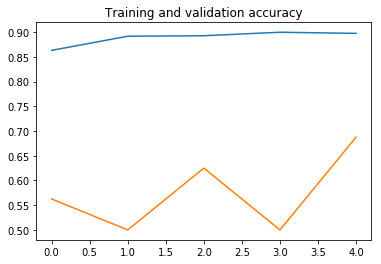

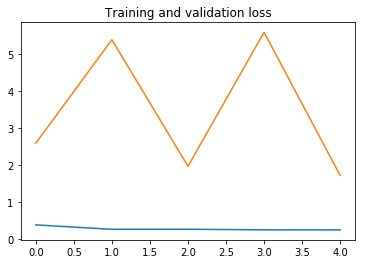

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

### Evaluate the model

In [25]:
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print('Loss:', result[0])
print('Accuracy:', result[1])

624/624 [==============================] - 23s 36ms/step
Loss: 1.0334093056082538
Accuracy: 0.6875


#### Test output

In [34]:
y_pred_batches = []
y_true_batches = []
y_img_batches =[]

for i in range(0, len(test_generator)):
  y_img_batch, y_true_batch = test_generator[i]
  y_true_batch = y_true_batch.argmax(axis=-1)
  y_img_batches.append(y_img_batch)
  y_true_batches.append(y_true_batch)

  y_pred_batch = model.predict(y_img_batch)
  y_pred_batch = y_pred_batch.argmax(axis=-1)
  y_pred_batches.append(y_pred_batch)

y_pred_batches

[array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),

## Make predictions

In [0]:
import numpy as np
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,nb_samples)

In [45]:
import pandas as pd

predicted_class_indices = np.argmax(predict, axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
results = pd.DataFrame({"Filename": filenames,
                        "Predictions": predictions})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
results

,Filename,Predictions
0,NORMAL/IM-0001-0001.jpeg,PNEUMONIA
1,NORMAL/IM-0003-0001.jpeg,PNEUMONIA
2,NORMAL/IM-0005-0001.jpeg,NORMAL
3,NORMAL/IM-0006-0001.jpeg,NORMAL
4,NORMAL/IM-0007-0001.jpeg,PNEUMONIA
5,NORMAL/IM-0009-0001.jpeg,PNEUMONIA
6,NORMAL/IM-0010-0001.jpeg,PNEUMONIA
7,NORMAL/IM-0011-0001-0001.jpeg,PNEUMONIA
8,NORMAL/IM-0011-0001-0002.jpeg,PNEUMONIA
9,NORMAL/IM-0011-0001.jpeg,PNEUMONIA


In [0]:
def predict_images(images_path, label):
  amount = 0
  fig = plt.figure(figsize=(18, 8))

  for file in os.listdir(images_path):
    if file.endswith('.jpeg'):
      if amount == 8:
        break

      img = mpimg.imread(os.path.join(images_path, file))
      plt.subplot(241+amount)
      plt.title('{} ---- {}'.format(label, 'NORMAL' if y_pred_batches[amount] == 0 else 'PNEUMONIA'))
      imgplot = plt.imshow(img)

      amount += 1

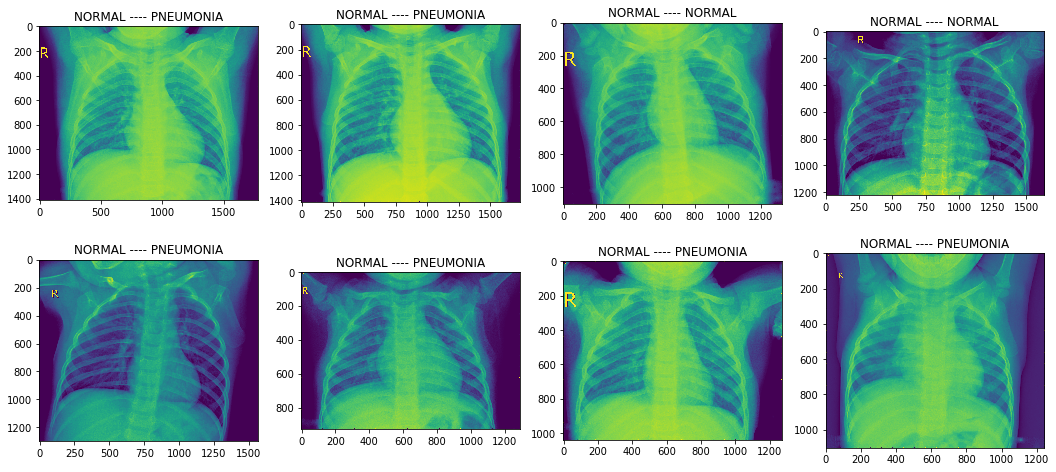

In [47]:
predict_images('./chest_xray/val/NORMAL', 'NORMAL')

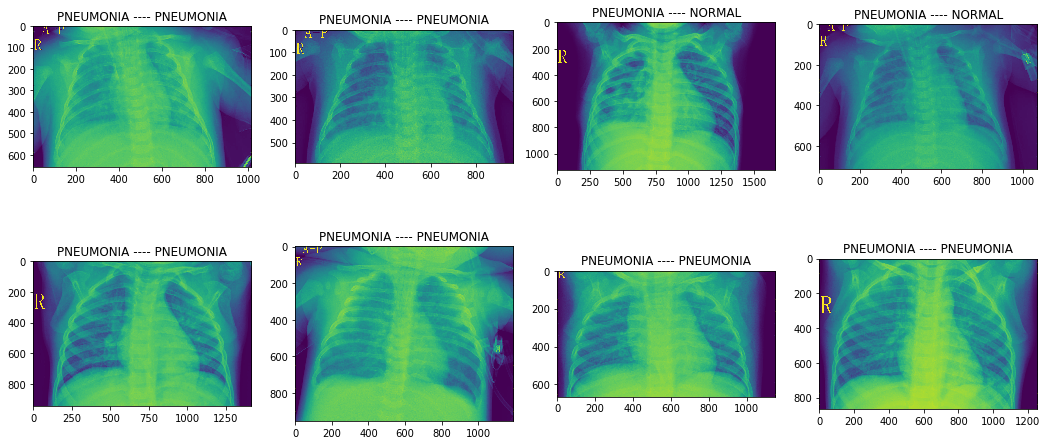

In [48]:
predict_images('./chest_xray/val/PNEUMONIA', 'PNEUMONIA')

In [0]:
model.save('awesome_model.h5')

In [0]:
new_model = keras.models.load_model('awesome_model.h5')

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)